# PTO on TSP
## Some TSPLIB problems: a larger experiment

In `TSP.ipynb` we have seen how PTO can be used on TSP with emphasis on how it work.

In this notebook we quickly visualise the results from a larger run. We have 6 problem instances, 5 solvers, 2 generators, linear and structured trace types. We carry out each combination of parameters 30 times and simply use boxplots to visualise the results. Boxplots appear decisive: no statistical tests are needed.

The overall conclusion is that HC with the "smart" generator randsol3 is the best combination by far.

EA with the simple generator randsol1 is weaker than HC/LA with the same generator. And EA with randsol3 was also weaker then the MGA, But preforms much better than MGA with randsol1.

With RS, randsol3 is better by far.

Similar story for MGA, with randsol1 preforming very badly across all cases compared to randsol3. Except in the rat575 problem where it was best by far.

With HC/LA, the story is less simple: in some cases, randsol1 is better than randsol3.

There is no overall benefit to the structured trace. There are a few cases where it may improve or disimprove performance slightly, but these cases are inconsistent and the margins are smaller than the other results mentioned.

When reading each boxplot, the objective value is on the y-axis. It is the negative of the tour length. Higher is better. Each figure represents the results of one combination of (problem instance, solver). Within each figure, four boxplots represent the combinations of (generator, trace type).

The total runtime was a few days on a cloud VM with 8 CPU's and 16GB RAM.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
d = pd.read_csv("TSP_results.dat", delimiter="\t", names=["instance", "solver", "generator", "str_trace", "budget", "rep", "obj", "tour"])

In [3]:
d.head()

,instance,solver,generator,str_trace,budget,rep,obj,tour
0,a280.tsp.gz,EA,randsol1,0,20000,0,-19586.163058,"[29, 38, 31, 43, 33, 90, 59, 169, 101, 164, 24..."
1,a280.tsp.gz,EA,randsol1,0,20000,1,-20451.585326,"[129, 46, 176, 242, 3, 139, 223, 222, 215, 221..."
2,a280.tsp.gz,EA,randsol1,0,20000,10,-19511.789660,"[65, 56, 53, 59, 226, 225, 232, 163, 197, 67, ..."
3,a280.tsp.gz,EA,randsol1,0,20000,11,-18780.975723,"[113, 86, 83, 189, 183, 186, 200, 274, 62, 101..."
4,a280.tsp.gz,EA,randsol1,0,20000,12,-18556.419876,"[277, 236, 206, 228, 217, 199, 191, 167, 86, 8..."


# Generate figures and a table for paper

In [4]:
insts = [
 'att48.tsp.gz',
 'berlin52.tsp.gz',
 'eil101.tsp.gz',
 'u159.tsp.gz',
 'a280.tsp.gz',
 'rat575.tsp.gz',
]

In [5]:
solvers = ["EA", "HC", "LA", "MGA", "RS"]
generators = ["randsol1", "randsol3"]
gen_name = {"randsol1": "U", "randsol3": "H"}

print("Solver & Gen & ", end="")
for i, inst in enumerate(insts):
    print("   \multicolumn{2}{|c}{%s} & " % inst.split(".")[0], end="")
print(r"\\")
print(r"\hline")
for solver in solvers:
    for generator in generators:
        print("%s & %s" % (solver, gen_name[generator]), end="")
        for i, inst in enumerate(insts):
            dtmp = d[(d["instance"] == inst) 
                     & (d["str_trace"] == False) 
                     & (d["solver"] == solver) 
                     & (d["generator"] == generator)]
            mean = -dtmp["obj"].mean()
            std = dtmp["obj"].std()
            print(" & %.0f & (%.0f)" % (mean, std), end="")
        print(r"\\")

Solver & Gen &    \multicolumn{2}{|c}{att48} &    \multicolumn{2}{|c}{berlin52} &    \multicolumn{2}{|c}{eil101} &    \multicolumn{2}{|c}{u159} &    \multicolumn{2}{|c}{a280} &    \multicolumn{2}{|c}{rat575} & \\
\hline
EA & U & 67694 & (4516) & 14141 & (815) & 1767 & (89) & 234416 & (9444) & 19122 & (546) & 71751 & (1865)\\
EA & H & 81989 & (4309) & 18011 & (950) & 2219 & (65) & 244949 & (7216) & 19805 & (402) & 68259 & (609)\\
HC & U & 69166 & (6271) & 14447 & (1062) & 1642 & (88) & 202547 & (7898) & 16544 & (566) & 59316 & (1043)\\
HC & H & 66587 & (4704) & 15286 & (807) & 1936 & (86) & 214234 & (8470) & 18082 & (518) & 63090 & (1522)\\
LA & U & 64314 & (3774) & 14156 & (961) & 1570 & (64) & 193251 & (10920) & 16010 & (451) & 60097 & (1316)\\
LA & H & 67306 & (4442) & 15124 & (779) & 1961 & (85) & 211586 & (8606) & 17902 & (535) & 63015 & (1612)\\
MGA & U & 112320 & (3406) & 22826 & (490) & 2863 & (38) & 380361 & (4164) & 30143 & (272) & 104414 & (684)\\
MGA & H & 70932 & (2454) & 1

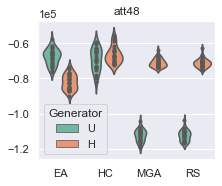

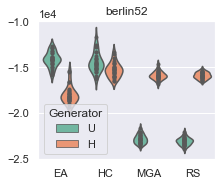

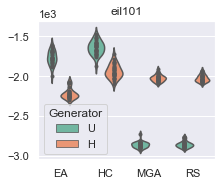

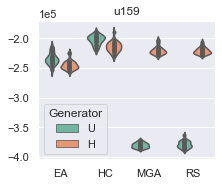

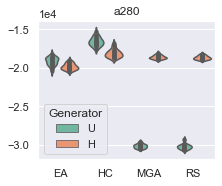

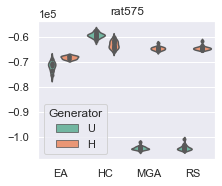

In [8]:
solvers = ["EA", "HC", "MGA", "RS"]
generators = ["randsol1", "randsol3"]
gen_name = {"randsol1": "U", "randsol3": "H"}
#gen_name = {"randsol1": "Unbiased", "randsol3": "Heuristic"}

sns.set()

for i, inst in enumerate(insts):
    dtmp = d[(d["instance"] == inst) & (d["str_trace"] == False) & (d["solver"] != "LA")]
    dtmp = dtmp.assign(Generator=dtmp.generator.map(gen_name)) 
    #dtmp = [dtmp[(d["solver"] == solver) & (d["generator"] == generator)]["obj"] for solver in solvers for generator in generators]
    sns.violinplot(x="solver", hue="Generator", y="obj", data=dtmp, order=solvers, inner="points",
                  palette=sns.color_palette("Set2", 10))
    
    plt.ylabel("")
    #labels = ["%s, %s" % (solver, gen_name[generator]) for solver in solvers for generator in generators]
    inst_txt = inst.split(".")[0]
    plt.title(inst_txt)
    fig = plt.gcf()
    fig.set_size_inches(3.25, 2.75)
    ax = plt.gca()
    ax.set_xlabel("")
    #fmt = FormatStrFormatter('%1.1f')
    #fmt.use_offset(True)
    #ax.yaxis.set_major_formatter(fmt)
    #ax.get_yaxis().get_major_formatter().set_useOffset(True)
    #locater = MaxNLocator(nbins=4)
    #ax.yaxis.set_major_locator(locater)
    fmt = ScalarFormatter()
    fmt.set_powerlimits((-3, 3))
    ax.yaxis.set_major_formatter(fmt)
    #ax.get_yaxis().ticklabel_format(useOffset=False) 
    plt.tight_layout()
    plt.savefig("img/TSP_violinplot_%s.pdf" % inst_txt)
    plt.show()
    

# Instance: 'att48.tsp.gz'

Observation: HC, LA, EA all do much better than RS and MGA. All do better with the smart generator than the simple one except EA which seems to do worse with the smart generator. Even RS with the smart generator is not too bad, and MGA is much improved using the smart generator. Choice of linear versus structured trace doesn't make a big difference.

## Random search

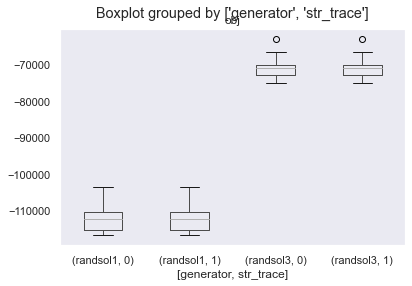

In [11]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

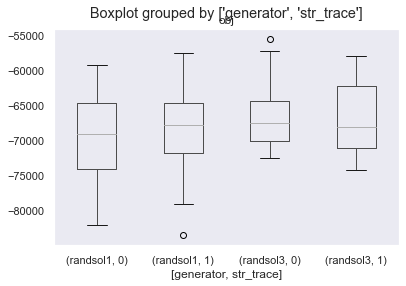

In [12]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

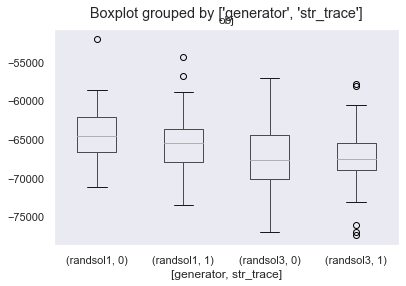

In [13]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

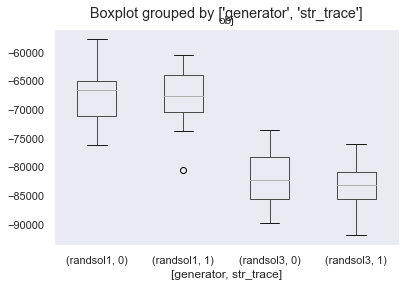

In [14]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

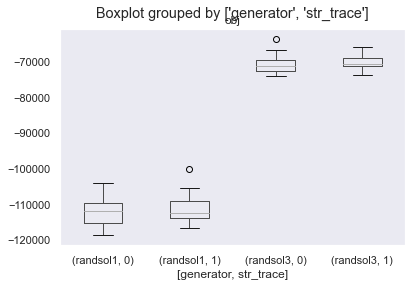

In [15]:
d[(d["instance"] == "att48.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'berlin52.tsp.gz'

HC and LA preforming very well. LA, HC and EA all preforming better under randsol1. RS and MGA preforming better using randsol3.

## Random search

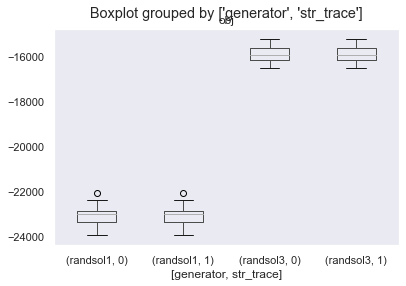

In [33]:
d[(d["instance"] == "berlin52.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill Climbing

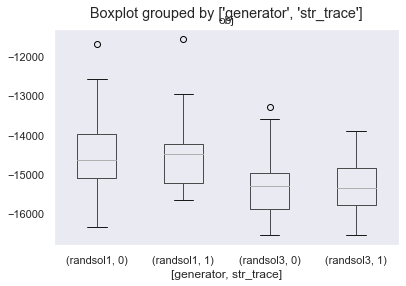

In [34]:
d[(d["instance"] == "berlin52.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

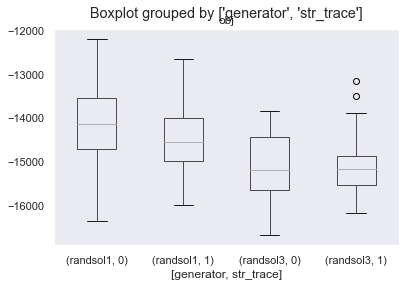

In [35]:
d[(d["instance"] == "berlin52.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary Algorithm

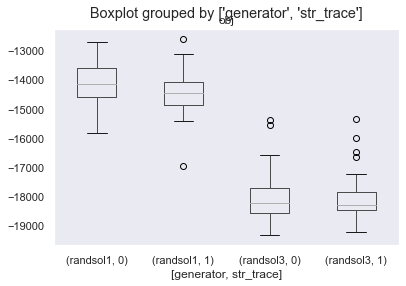

In [36]:
d[(d["instance"] == "berlin52.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

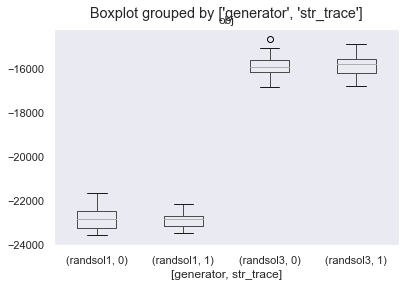

In [37]:
d[(d["instance"] == "berlin52.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'eil101.tsp.gz'
Similar story as above. LA, HC and EA all preforming very well under randsol1. RS and MGA preforming better under randsol3, even better then others.

## Random search

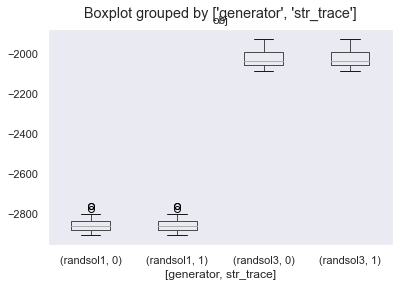

In [38]:
d[(d["instance"] == "eil101.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill Climbing

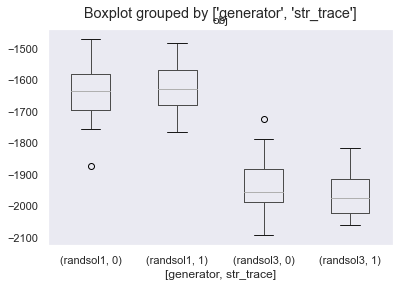

In [39]:
d[(d["instance"] == "eil101.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

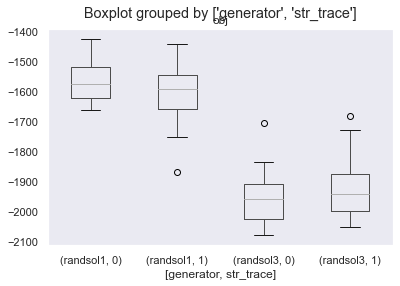

In [40]:
d[(d["instance"] == "eil101.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary Algorithm

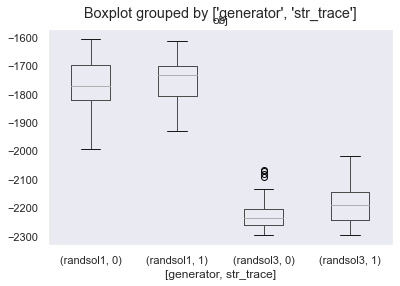

In [41]:
d[(d["instance"] == "eil101.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

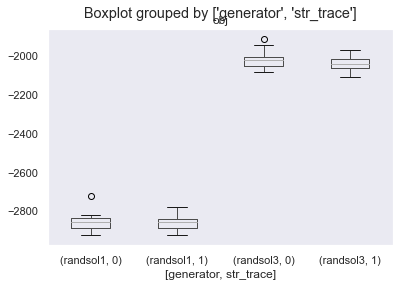

In [42]:
d[(d["instance"] == "eil101.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'u159.tsp.gz'

Observation: HC > EA and LA > RS. Again MGA preforms very badly under randsol1, like random search, but for EA, RS and MGA (smart) randsol3 much better. No benefit to structured trace.

## Random search

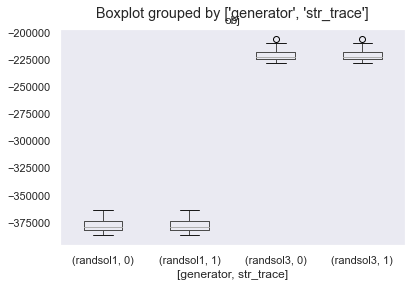

In [16]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

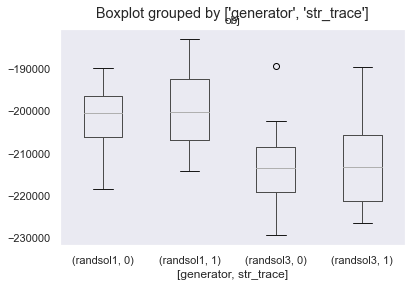

In [17]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

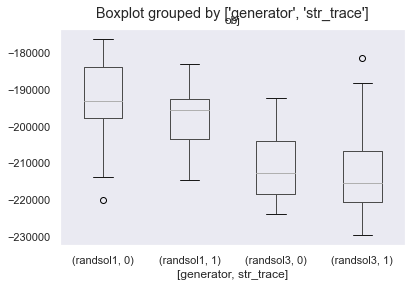

In [18]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

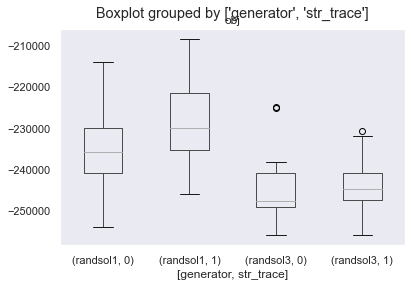

In [21]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

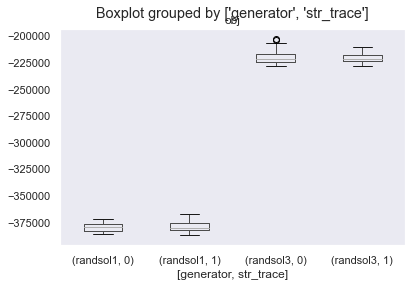

In [20]:
d[(d["instance"] == "u159.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'a280.tsp.gz'

Observation: similar to u159, except that for HC, EA and LA, randsol3 is slightly worse. Again randsol3 is much better for RS and MGA. With MGA preforming better than EA with the smart generator.

## Random search

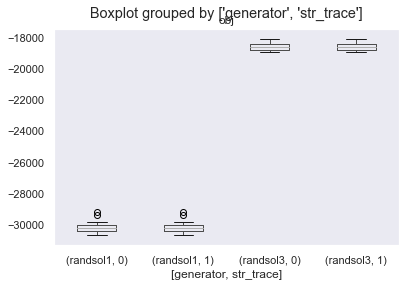

In [22]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

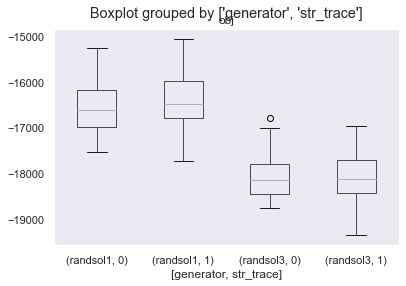

In [23]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

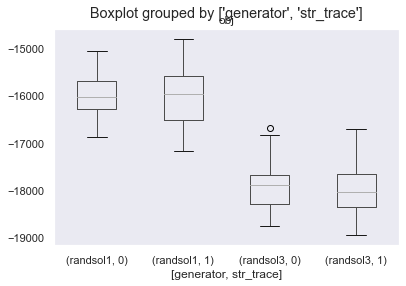

In [24]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

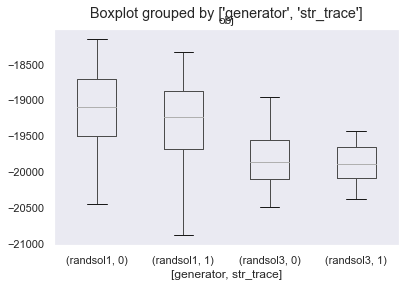

In [25]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

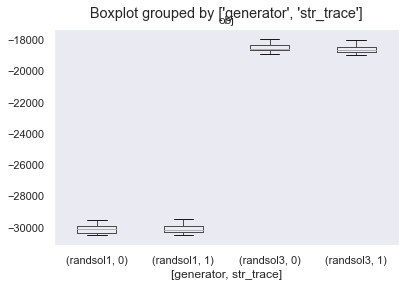

In [26]:
d[(d["instance"] == "a280.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

# Instance: 'rat575.tsp.gz'

Observation: This time MGA preforms by far the best using ransol1 and ransol3 with the best results using the smart generator. HC, LA both produced better results under randsol1, with RS and EA performing better with randsol3.

## Random search

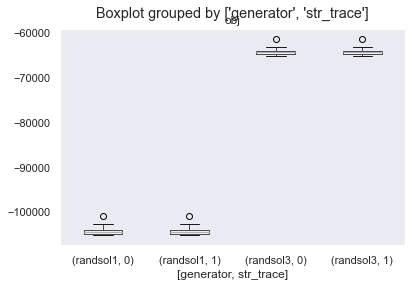

In [27]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "RS")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Hill-climbing

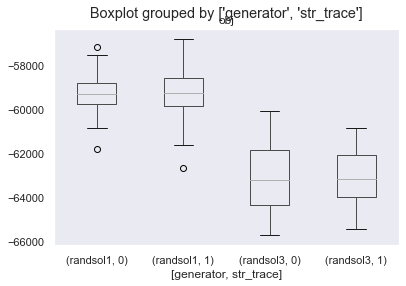

In [28]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "HC")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Late-acceptance

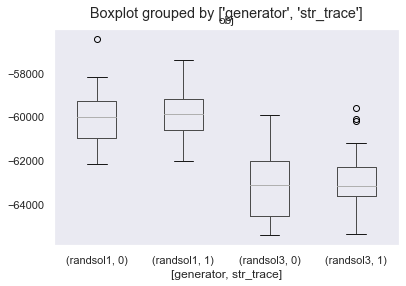

In [29]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "LA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Evolutionary algorithm

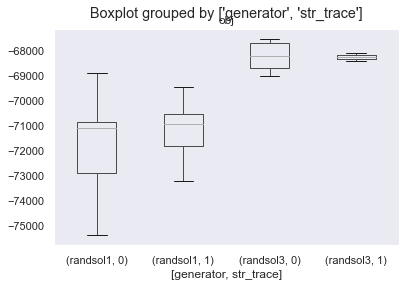

In [32]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "EA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);

## Microbial Genetic Algorithm

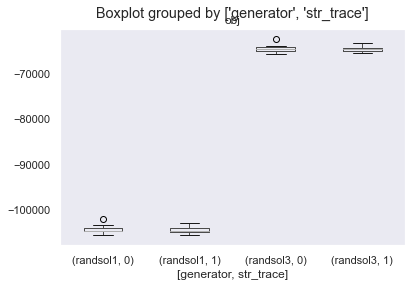

In [9]:
d[(d["instance"] == "rat575.tsp.gz") & (d["solver"] == "MGA")].boxplot(column="obj", by=["generator", "str_trace"], grid=False);